# Install libs

https://github.com/nicknochnack/TensorflowKeras-ReinforcementLearning/blob/master/Deep%20Reinforcement%20Learning.ipynb

In [25]:
#!pip install tensorflow==2.3.0
#!pip install gym
#!pip install keras
#pip install keras-rl2
#!pip install pyglet

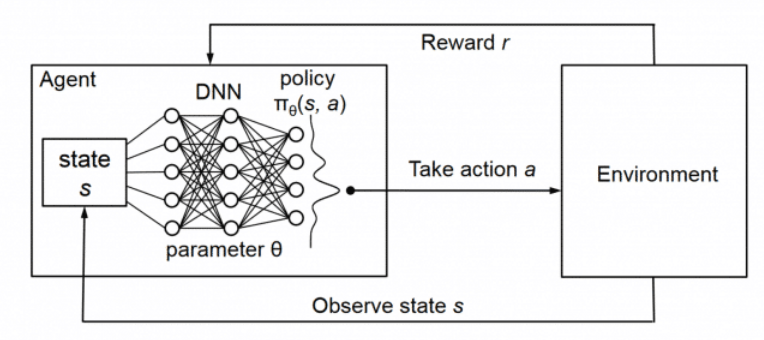
https://www.novatec-gmbh.de/wp-content/uploads/reinforcement_learning_loop-650x294.png

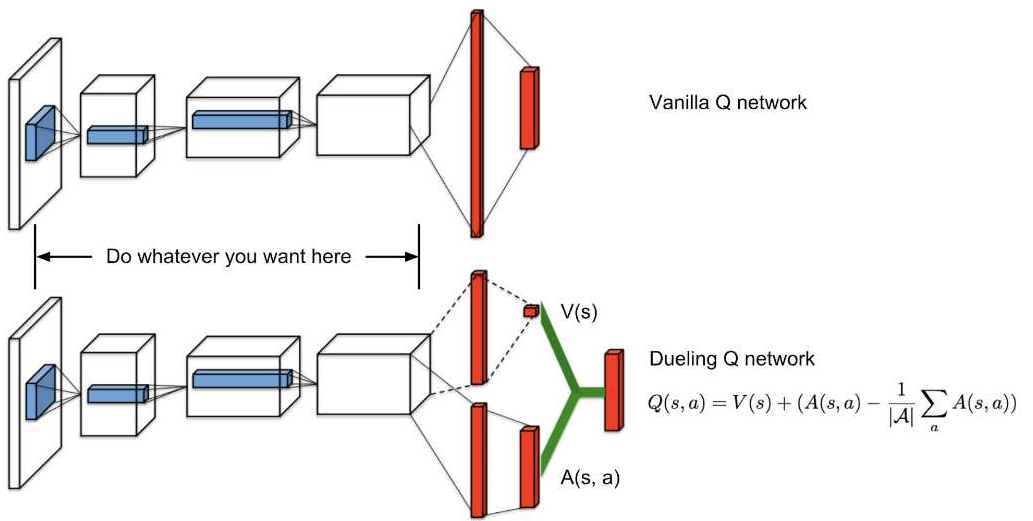

https://theaisummer.com/static/b0f4c8c3f3a5158b5899aa52575eaea0/95a07/DDQN.jpg

# Test Cart Pole Environment with OpenAI Gym

In [1]:
import gym 
import random

In [2]:
# open env from gym
env = gym.make('CartPole-v0')

states = env.observation_space.shape[0]
actions = env.action_space.n

In [3]:
actions
states

4

In [34]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    
env.close()

Episode:1 Score:19.0
Episode:2 Score:11.0
Episode:3 Score:57.0
Episode:4 Score:14.0
Episode:5 Score:12.0
Episode:6 Score:27.0
Episode:7 Score:50.0
Episode:8 Score:16.0
Episode:9 Score:47.0
Episode:10 Score:17.0


# Create a Deep Learning Model 

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [18]:
def build_model(states, actions):
    model = tf.keras.Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [19]:
model = build_model(states, actions)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


# Build Agent 

In [21]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [28]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
   ##DDQN with parameters
    
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
    nb_actions=actions, nb_steps_warmup=10, gamma=.99, 
    target_model_update=1e-2,
    #train_interval=4,
    #delta_clip=1.,
    enable_double_dqn=True
)
    return dqn

In [29]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 115s 11ms/step - reward: 1.0000
70 episodes - episode_reward: 141.357 [15.000, 200.000] - loss: 10.011 - mae: 38.300 - mean_q: 77.067

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 119s 12ms/step - reward: 1.0000
55 episodes - episode_reward: 183.345 [137.000, 200.000] - loss: 3.687 - mae: 38.743 - mean_q: 77.762

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 120s 12ms/step - reward: 1.0000
51 episodes - episode_reward: 193.608 [112.000, 200.000] - loss: 3.830 - mae: 38.640 - mean_q: 77.536

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 113s 11ms/step - reward: 1.0000
51 episodes - episode_reward: 197.882 [162.000, 200.000] - loss: 5.146 - mae: 38.165 - mean_q: 76.537

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 124s 12ms/step - reward: 

In [35]:
scores = dqn.test(env, nb_episodes=10, visualize=True)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
200.0


In [36]:
env.close()

# Reloading Agent from Memory

In [32]:
dqn.save_weights('ddqn_weights.h5f', overwrite=True)

In [33]:
dqn.load_weights('ddqn_weights.h5f')